In [5]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# DIRECTORY OF SAVED DATA
base_dir = r"H:\\moldflow\\moldflow_automation\\80CENTER-03mm-s"                #80CENTER07-real master curve                 #80CENTER-03mm-s

# Load data
with open(os.path.join(base_dir, "guess_data_all.pkl"), "rb") as f:
    guess_data_all = pickle.load(f)

with open(os.path.join(base_dir, "guess_data_all_optim.pkl"), "rb") as f:
    guess_data_all_optim = pickle.load(f)

area_data = np.load(os.path.join(base_dir, "area_data.npy")).tolist()
valid_xml = np.load(os.path.join(base_dir, "valid_xml.npy")).tolist()

train_df = pd.read_csv(os.path.join(base_dir, "train_data.csv"))
best_df = pd.read_csv(os.path.join(base_dir, "best_params.csv"))

curves = np.load(os.path.join(base_dir, "resampled_curves.npz"))
common_time = curves["common_time"]
real_force_resampled = curves["real_force_resampled"]



In [6]:
print(train_df)
best_rows = train_df[train_df["neg_MSE"] == train_df["neg_MSE"].max()]
print(best_rows)

           n       tau_star              B     tau_w         m        neg_MSE
0   0.398532  321506.547169  129998.102181  0.038165  1.323344 -308743.803016
1   0.375935  561790.052051  570615.584849  0.525292  1.637877  -66622.899234
2   0.245025  855262.517452  991786.757685  0.990920  1.456428  -71868.923162
3   0.560466  404293.149590  859569.197008  0.844746  1.028504  -41776.466964
4   0.517863  776415.815027  411980.255931  0.349912  1.680887 -147536.320955
..       ...            ...            ...       ...       ...            ...
60  0.600000  983259.473570  350109.997583  0.690197  1.900000  -18216.150444
61  0.200000  577811.242691  941637.316252  0.450820  1.000000  -22329.078159
62  0.600000  696815.664982  467915.959318  0.703328  1.900000  -18675.398833
63  0.600000  977416.818642  476651.340003  0.729320  1.900000  -19422.292386
64  0.600000  274379.439542  632037.275469  0.936829  1.900000  -18226.813113

[65 rows x 6 columns]
      n       tau_star              B  ta

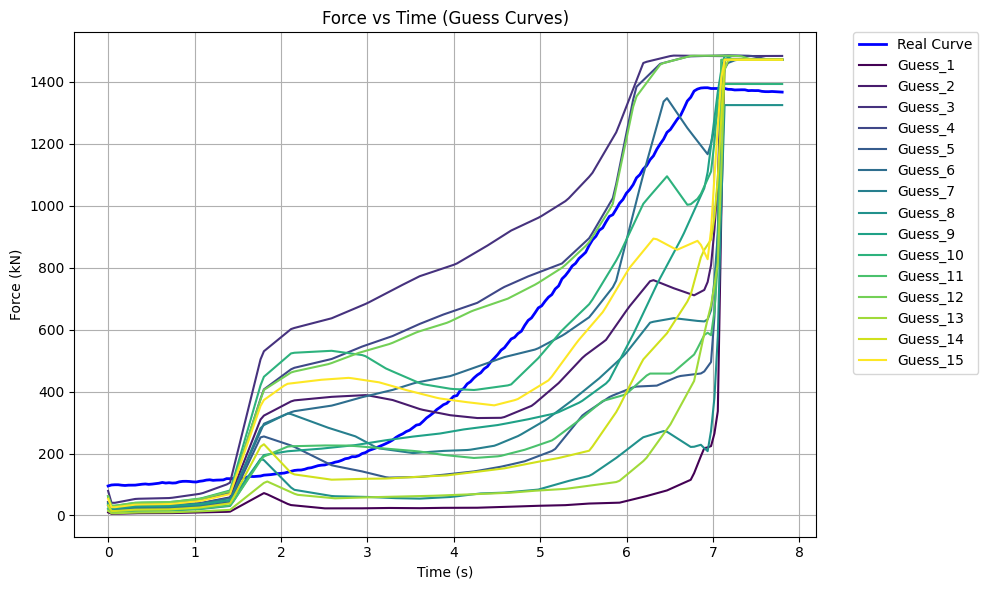

C:\Users\sozenosk\AppData\Local\Temp\ipykernel_14796\1619866982.py:44: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


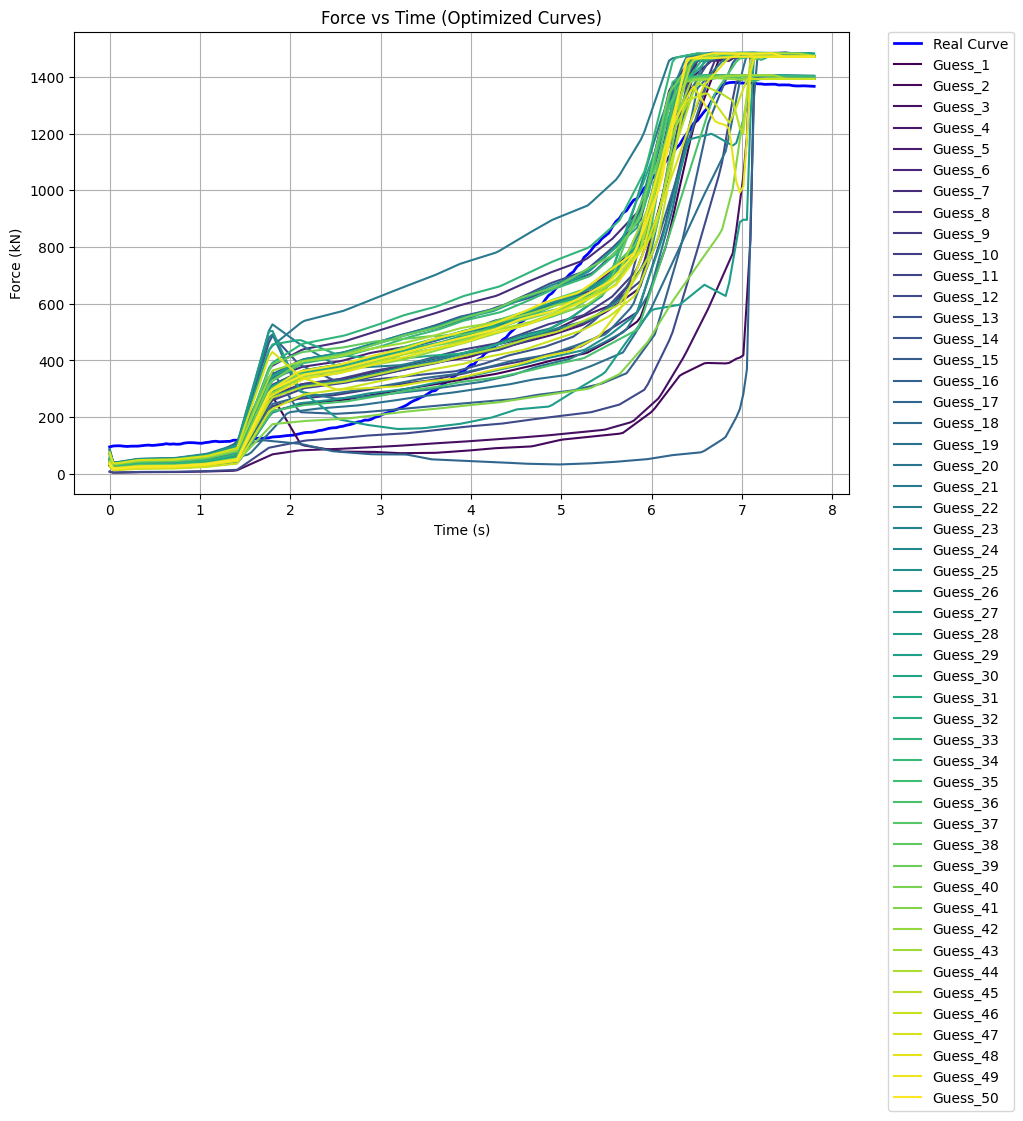

In [7]:
num_curves = len(guess_data_all)
plt.figure(figsize=(10, 6))


plt.plot(common_time, real_force_resampled, 'b-', label='Real Curve', linewidth=2)


if num_curves > 0:
    colormap = plt.get_cmap('viridis', num_curves)
    for i, (key, guess_data) in enumerate(guess_data_all.items()):
        
        guess_data_array = np.array([(float(x), float(y)) for x, y in guess_data])
        guess_time = guess_data_array[:, 0]
        guess_force = guess_data_array[:, 1] * 9.80665  

        guess_force_resampled = np.interp(common_time, guess_time, guess_force)
        plt.plot(common_time, guess_force_resampled, color=colormap(i), label=f'Guess_{i+1}')

plt.xlabel('Time (s)')
plt.ylabel('Force (kN)')  
plt.title('Force vs Time (Guess Curves)')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.show()
# Plot Optimization
plt.figure(figsize=(10, 6))
plt.plot(common_time, real_force_resampled, 'b-', label='Real Curve', linewidth=2)

if guess_data_all_optim:
    colormap = plt.get_cmap('viridis', len(guess_data_all_optim))
    for i, (key, guess_data) in enumerate(guess_data_all_optim.items()):
        guess_data_array = np.array([(float(x), float(y)) for x, y in guess_data])
        guess_time = guess_data_array[:, 0]
        guess_force = guess_data_array[:, 1] * 9.80665  
        guess_force_resampled = np.interp(common_time, guess_time, guess_force)
        plt.plot(common_time, guess_force_resampled, color=colormap(i), label=f'Guess_{i+1}')

plt.xlabel("Time (s)")
plt.ylabel("Force (kN)")
plt.title("Force vs Time (Optimized Curves)")
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.show()
